In [2]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from scipy.stats import rel_breitwigner

In [ ]:
# #print(sig_zvals)
# plt.plot(sig_zvals,int_zvals, color='blue', label='Z')
# plt.plot(sig_zvals, int_wvals, color = 'red', label= 'W' )
# plt.ylabel('Counts')
# plt.xlabel('Z and W Resolution [GeV]')
# plt.legend()
# #plt.title('S/N = '+str(round(SN_yas_val))+'  $\sigma_z$='+str(round(SN_yas,4)) )
# plt.show()

# plt.plot(sig_zvals,SN_vals)
# plt.yscale("log")
# #plt.title('S/N = '+str(round(SN_yas_val))+'  $\sigma_z$='+str(round(SN_yas,4)) )
# plt.ylabel('Signal to Background')
# plt.xlabel('Z and W Resolution [GeV]')


In [3]:
m_w = 80.37
w_w =2/2
m_z = 91.18
w_z= 2.5/2

def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

x_vals = np.linspace(70,100,10**4)

pts=1000
SN_vals=np.zeros(pts)
sig_zvals=np.zeros(pts)
int_zvals=np.zeros(pts)
int_wvals=np.zeros(pts)
for i in range(pts):
    sig=1.2+2*10**-3*i
    sig_z= np.sqrt(w_z**2+sig**2)
    sig_w = np.sqrt(w_w**2+sig**2)
    
    if sig <= w_w or sig <=w_z:
        SN_vals[i]=SN_vals[i-1]
        sig_zvals[i]=sig
    else:
        sig_zvals[i]=sig
        #print(sig_zvals[i])
        wind_l= m_z - 3*sig_z
        wind_r = m_z + 3*sig_z

        int_z= integrate.quad(lambda x: gaussian(x, m_z, sig_z), wind_l, wind_r)
        int_w= integrate.quad(lambda x: 10* gaussian(x, m_w, sig_w), wind_l, wind_r)
    
        int_zvals[i]=int_z[0]
        int_wvals[i]=int_w[0]
        if int_wvals[i] != 0:
            SN= int_z[0]/int_w[0]
            SN_vals[i]=SN
            if SN<=10.1 and SN>=9.9:
                SN_yas_val=SN
                print(sig, sig_w, sig_z, int_z, int_w, SN)
                SN_tz= sig_z
                SN_tw=sig_w
                SN_yas=sig



1.674 1.949942563256672 2.0892046333473417 (0.9973002039367393, 1.1072256503105314e-14) (0.09916365714878213, 2.5131422678758666e-15) 10.057113993289098
1.676 1.9516598064211907 2.090807499508264 (0.997300203936737, 1.1072256503105314e-14) (0.10036412291192902, 2.6496130995209314e-15) 9.93681980175209


<unknown>:3: SyntaxWarning: invalid escape sequence '\d'
<unknown>:3: SyntaxWarning: invalid escape sequence '\%'
<unknown>:6: SyntaxWarning: invalid escape sequence '\d'
<unknown>:6: SyntaxWarning: invalid escape sequence '\%'
<unknown>:9: SyntaxWarning: invalid escape sequence '\d'
<unknown>:9: SyntaxWarning: invalid escape sequence '\%'
<unknown>:12: SyntaxWarning: invalid escape sequence '\d'
<unknown>:12: SyntaxWarning: invalid escape sequence '\%'
<unknown>:15: SyntaxWarning: invalid escape sequence '\d'
<unknown>:15: SyntaxWarning: invalid escape sequence '\%'
<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\%'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\%'
<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\%'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\%'
<>:15: SyntaxWarning: in

Text(0.5, 0, 'Mass [GeV]')

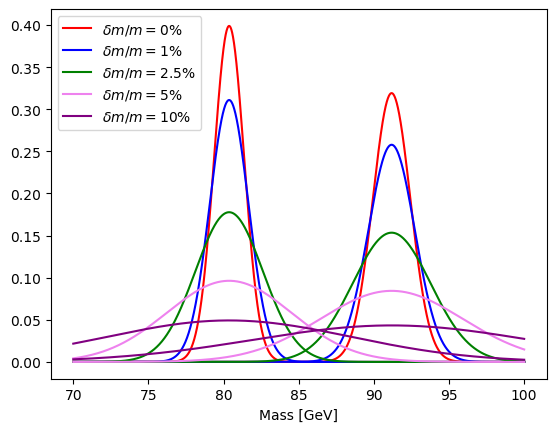

In [20]:
res=[0,1,2.5, 5,10]
#0
plt.plot(x_vals, gaussian(x_vals, m_w, np.sqrt(w_w**2 +(res[0]/100*m_w)**2)), label = f'$\delta m/m = {res[0]} \%$', color = 'r')
plt.plot(x_vals, gaussian(x_vals, m_z, np.sqrt(w_z**2 +(res[0]/100*m_z)**2)), color='r' )
#1
plt.plot(x_vals, gaussian(x_vals, m_w, np.sqrt(w_w**2 +(res[1]/100*m_w)**2)), label = f'$\delta m/m = {res[1]} \%$', color = 'b')
plt.plot(x_vals, gaussian(x_vals, m_z, np.sqrt(w_z**2 +(res[1]/100*m_z)**2)), color='b' )
#2.5
plt.plot(x_vals, gaussian(x_vals, m_w, np.sqrt(w_w**2 +(res[2]/100*m_w)**2)), label = f'$\delta m/m = {res[2]} \%$', color = 'g')
plt.plot(x_vals, gaussian(x_vals, m_z, np.sqrt(w_z**2 +(res[2]/100*m_z)**2)), color='g' )
#5
plt.plot(x_vals, gaussian(x_vals, m_w, np.sqrt(w_w**2 +(res[3]/100*m_w)**2)), label = f'$\delta m/m = {res[3]} \%$', color = 'violet')
plt.plot(x_vals, gaussian(x_vals, m_z, np.sqrt(w_z**2 +(res[3]/100*m_z)**2)), color='violet' )
#10
plt.plot(x_vals, gaussian(x_vals, m_w, np.sqrt(w_w**2 +(res[4]/100*m_w)**2)), label = f'$\delta m/m = {res[4]} \%$', color = 'purple')
plt.plot(x_vals, gaussian(x_vals, m_z, np.sqrt(w_z**2 +(res[4]/100*m_z)**2)), color='purple' )

plt.legend()
plt.xlabel('Mass [GeV]')
#plt.ylabel('Signal in a.u.')

In [22]:
for i in range(len(res)):
    print(res[i]/np.sqrt(2))
    

0.0
0.7071067811865475
1.7677669529663687
3.5355339059327373
7.071067811865475


<unknown>:4: SyntaxWarning: invalid escape sequence '\p'
<unknown>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<ipython-input-112-e607a7ab124d>:4: SyntaxWarning: invalid escape sequence '\p'
  plt.axvline(m_z+3*SN_tz, linestyle ='dashed', label = '$\pm 3 \sigma_z$')
<ipython-input-112-e607a7ab124d>:5: SyntaxWarning: invalid escape sequence '\s'
  plt.title('S/N = '+str(round(SN_yas_val))+'  $\sigma_z$='+str(round(SN_yas,4)) )


Text(0, 0.5, 'Signal in a.u.')

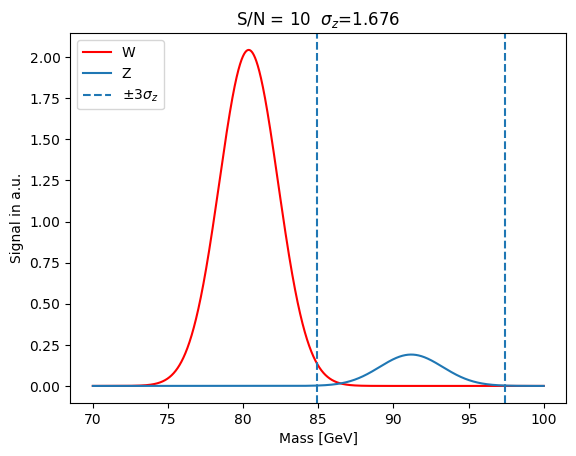

In [112]:

plt.plot(x_vals, 10*gaussian(x_vals, m_w, SN_tw), label = 'W', color = 'r')
plt.plot(x_vals, gaussian(x_vals, m_z, SN_tz), label = 'Z' )
plt.axvline(m_z-3*SN_tz, linestyle ='dashed')
plt.axvline(m_z+3*SN_tz, linestyle ='dashed', label = '$\pm 3 \sigma_z$')
plt.title('S/N = '+str(round(SN_yas_val))+'  $\sigma_z$='+str(round(SN_yas,4)) )
plt.legend()
plt.xlabel('Mass [GeV]')
plt.ylabel('Signal in a.u.')

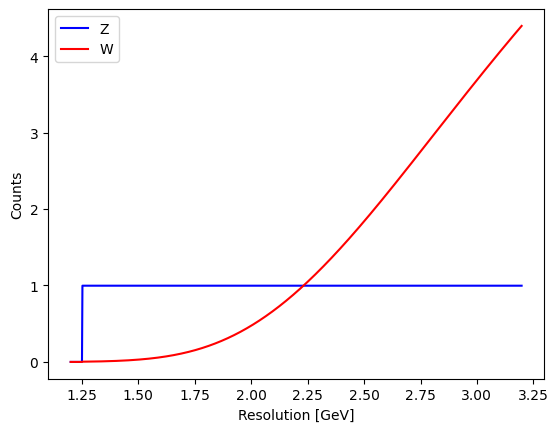

Text(0.5, 0, 'Resolution [GeV]')

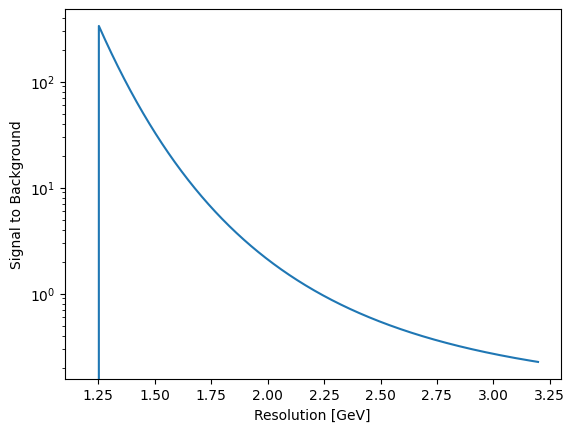

In [6]:
#print(sig_zvals)
plt.plot(sig_zvals,int_zvals, color='blue', label='Z')
plt.plot(sig_zvals, int_wvals, color = 'red', label= 'W' )
plt.ylabel('Counts')
plt.xlabel('Resolution [GeV]')
plt.legend()
#plt.title('S/N = '+str(round(SN_yas_val))+'  $\sigma_z$='+str(round(SN_yas,4)) )
plt.show()

plt.plot(sig_zvals,SN_vals)
plt.yscale("log")
#plt.title('S/N = '+str(round(SN_yas_val))+'  $\sigma_z$='+str(round(SN_yas,4)) )
plt.ylabel('Signal to Background')
plt.xlabel('Resolution [GeV]')


In [12]:
#SN_yas/(np.sqrt(2))

(2.25/np.sqrt(2))/45.5

0.034966818849884215

In [1]:
# sig=1.25
# sig_z= np.sqrt(w_z**2+sig**2)
# sig_w = np.sqrt(w_w**2+sig**2)
# wind_l= m_z - 3*sig_z
# wind_r = m_z + 3*sig_z
# int_z= integrate.quad(lambda x: gaussian(x, m_z, sig_z), wind_l, wind_r)
# int_w= integrate.quad(lambda x: 10* gaussian(x, m_w, sig_w), wind_l, wind_r)
# SN= int_z[0]/int_w[0]
# print(SN, int_w)

# print(sig_w, w_w)
# if sig_w <= w_w*1.01 or sig_z <=w_z*1.01:
#     print(sig_w, w_w)

<class 'NameError'>: name 'np' is not defined

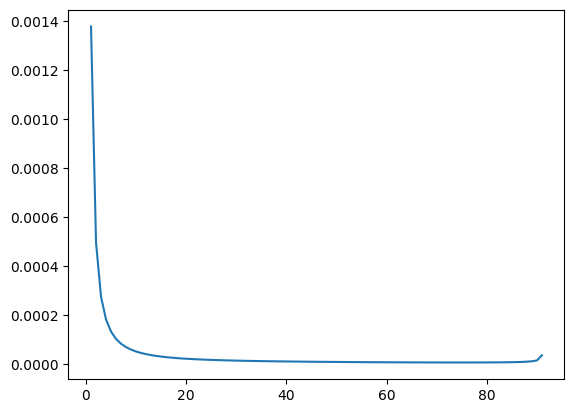

In [7]:
# SN=10
# sig=1.67

# p_1 = np.arange(1,m_z)
# p_2 = m_z - p_1

# A=(2*p_1*p_2)#*(1-np.cos(th))
# #print(A)
# sig_p=np.zeros(len(p_1))
# for i in range(len(p_1)):
#     sig_p[i] = np.sqrt(sig**2/(A[i]*((p_1[i])**2+(p_2[i])**2)))

# plt.plot(p_1, sig_p/p_1) 


In [ ]:
SN_yas=0
sig_z=w_z
sig_w = w_w
plt.plot(x_vals, rel_breitwigner(x_vals, m_z/w_z) )
plt.plot(x_vals, rel_breitwigner.rvs(x_vals, m_w/w_w)*10)
plt.axvline(m_z-3*sig_z)
plt.axvline(m_z+3*sig_z)
#plt.title('S/N = '+str(round(SN_yas_val))+'  $\sigma_z$='+str(round(SN_yas,4)) )
plt.xlabel('Mass [GeV]')
plt.ylabel('Signal')

<unknown>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<ipython-input-102-7489780860ab>:17: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(s_der, N_der, label="JER =$0.3\sqrt{E}$")


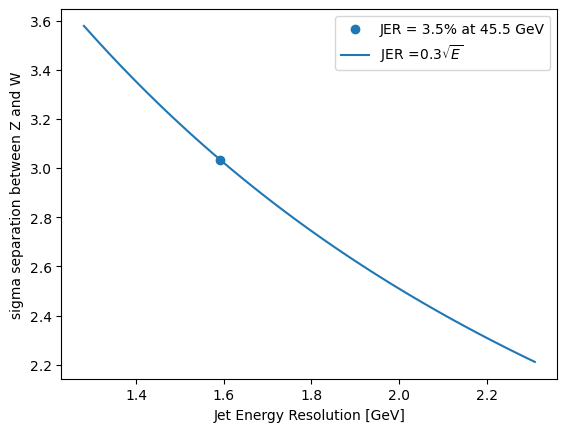

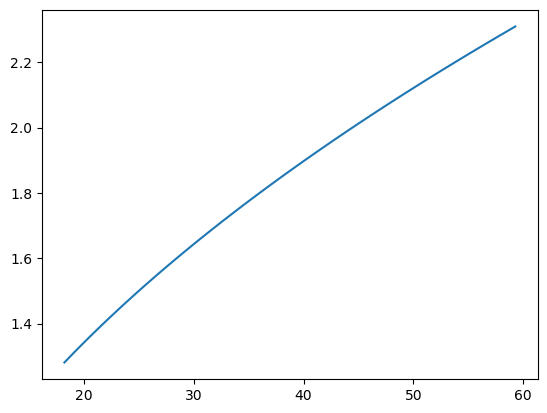

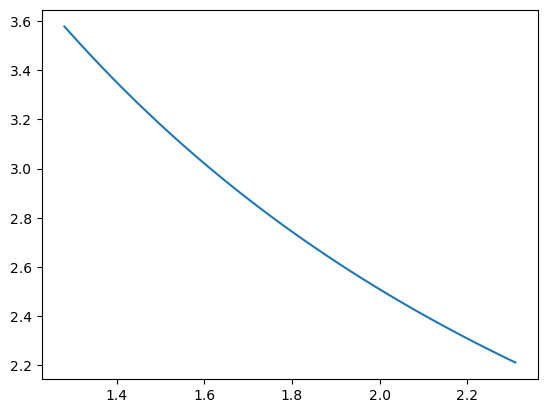

In [102]:
dm= m_z-m_w

JER= 0.035*45.5
#np.linspace(1.25, 4, 1000)
sig_ztot=w_z
sig_wtot=w_w
N = dm/(np.sqrt(sig_ztot**2+sig_wtot**2+4*JER**2))

E=np.linspace(0.2*m_z,0.65*m_z)
s_der= 0.3*np.sqrt(E)
sig_zder=w_z
sig_wder=w_w
N_der= dm/(np.sqrt(sig_zder**2+sig_wder**2+4*s_der**2))
JER_der= (s_der*E)[::-1]
 
plt.scatter(JER,N, label= "JER = 3.5% at 45.5 GeV")
plt.plot(s_der, N_der, label="JER =$0.3\sqrt{E}$")
plt.legend()
plt.xlabel('Jet Energy Resolution [GeV]')
plt.ylabel('sigma separation between Z and W')
#plt.plot(JER, 0.3/np.sqrt(JER))
plt.show()

plt.plot(E,s_der)
plt.show()
plt.plot(s_der,N_der)

In [75]:
np.sqrt(50)

7.0710678118654755